In [236]:
import os
#os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\zero_to_deep_learning_video-master\\data') #Personal
os.chdir('C:\\Users\\Administrator\\Desktop\Data')

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [238]:
df=pd.read_csv('banknotes.csv')
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


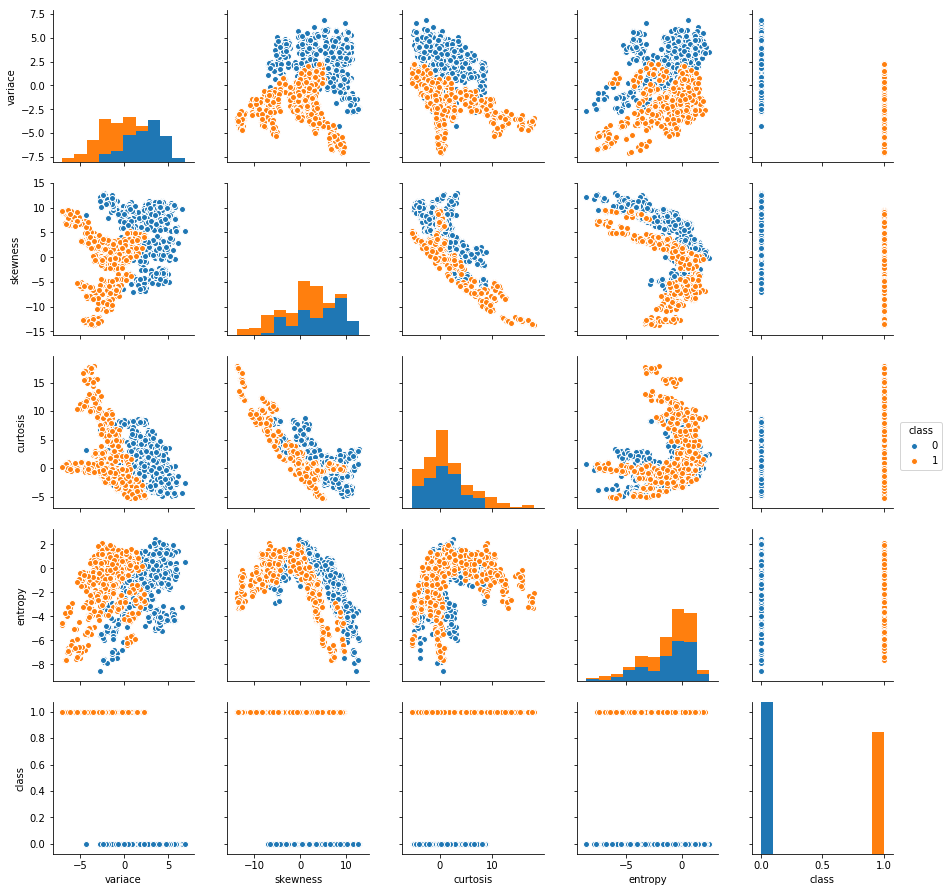

In [239]:
sns.pairplot(df, hue='class')

In [240]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [241]:
X=scale(df.drop('class',axis=1).values)
y=df['class'].values

In [242]:
model=RandomForestClassifier()
cross_val_score(model,X,y)

array([0.99344978, 0.98249453, 0.99562363])

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [244]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

Epoch 1/20
960/960 [==============================] - 0s 146us/step - loss: 0.8754 - acc: 0.4917
Epoch 2/20
960/960 [==============================] - 0s 33us/step - loss: 0.8102 - acc: 0.4990
Epoch 3/20
960/960 [==============================] - 0s 32us/step - loss: 0.7522 - acc: 0.5208
Epoch 4/20
960/960 [==============================] - 0s 33us/step - loss: 0.7010 - acc: 0.5417
Epoch 5/20
960/960 [==============================] - 0s 32us/step - loss: 0.6561 - acc: 0.5635
Epoch 6/20
960/960 [==============================] - 0s 33us/step - loss: 0.6168 - acc: 0.6052
Epoch 7/20
960/960 [==============================] - 0s 33us/step - loss: 0.5825 - acc: 0.6677
Epoch 8/20
960/960 [==============================] - 0s 33us/step - loss: 0.5527 - acc: 0.7125
Epoch 9/20
960/960 [==============================] - 0s 33us/step - loss: 0.5266 - acc: 0.7427
Epoch 10/20
960/960 [==============================] - 0s 33us/step - loss: 0.5038 - acc: 0.7760
Epoch 11/20
960/960 [=================

Text(0.5,1,'Test Accuracy: 88.8 %')

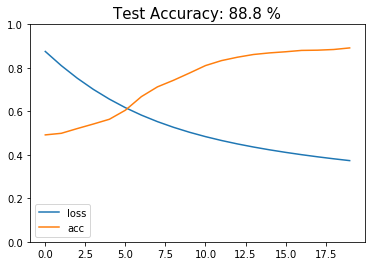

In [245]:
K.clear_session()
model=Sequential()
model.add(Dense(1,input_shape=(4,),activation='sigmoid'))
model.compile(optimizer='sgd',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=20)
print('\nHistory ',history)
result=model.evaluate(X_test,y_test)
print('\nResult of the model is ',result)
historydf=pd.DataFrame(history.history, index=history.epoch)
print('\nHistory of the model is ',historydf)

historydf.plot(ylim=(0,1))
plt.title('Test Accuracy: {:3.1f} %'.format(result[1]*100),fontsize=15)

Epoch 1/1
960/960 [==============================] - 0s 195us/step - loss: 0.5496 - acc: 0.7073


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Epoch 1/1
960/960 [==============================] - 0s 200us/step - loss: 0.4954 - acc: 0.7740
Epoch 1/1
960/960 [==============================] - 0s 186us/step - loss: 0.4341 - acc: 0.8115
Epoch 1/1
960/960 [==============================] - 0s 179us/step - loss: 0.3093 - acc: 0.8958
History
        acc      loss
0  0.707292  0.549627
1  0.773958  0.495370
2  0.811458  0.434058
3  0.895833  0.309253


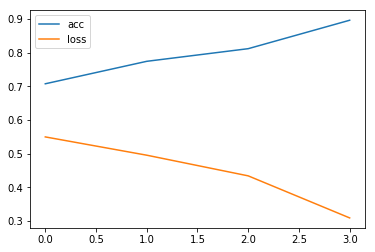

In [246]:
dflist=[]
a=pd.DataFrame(columns=('acc','loss'))
learning_rates=[0.01,0.05,0.1,0.5]
for lr in learning_rates:
    K.clear_session()
    K.clear_session()
    model=Sequential()
    model.add(Dense(1,input_shape=(4,),activation='sigmoid'))
    model.compile(optimizer=SGD(lr=lr),metrics=['accuracy'],loss='binary_crossentropy')
    h=model.fit(X_train,y_train,batch_size=16,verbose=1)
    b=pd.DataFrame(h.history, index=h.epoch)
    a=a.append(b,ignore_index=True)
print('History')
print(a)
a.plot()

In [247]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


SGD(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)
SGD(lr=0.01, momentum=0.3)
AxesSubplot(0.125,0.125;0.775x0.755)
SGD(lr=0.01, momentum=0.3, nesterov=True)
AxesSubplot(0.125,0.125;0.775x0.755)
Adam(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)
Adagrad(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)
RMSprop(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)


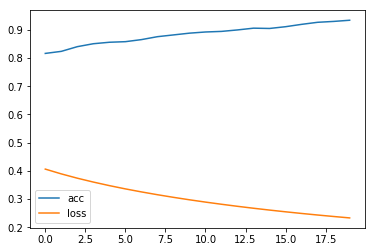

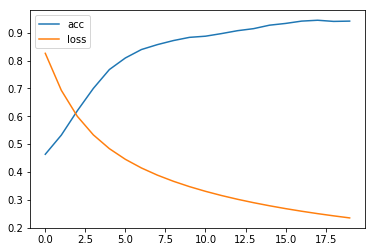

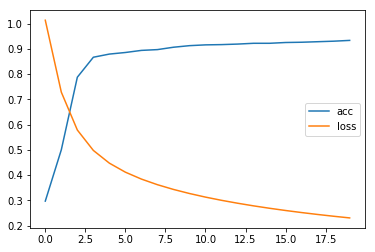

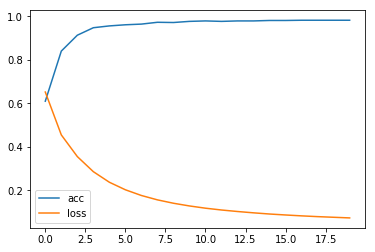

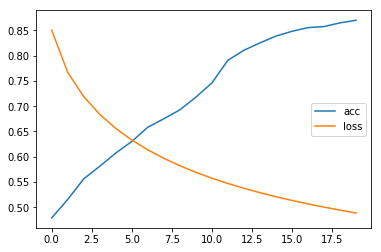

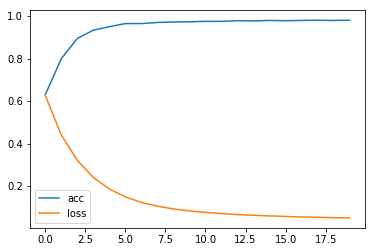

In [248]:
dflist=[]
optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']
for opt_name in optimizers:
    a=pd.DataFrame(columns=('acc','loss'))
    K.clear_session()
    K.clear_session()
    model=Sequential()
    model.add(Dense(1,input_shape=(4,),activation='sigmoid'))
    model.compile(optimizer=eval(opt_name),metrics=['accuracy'],loss='binary_crossentropy')
    h=model.fit(X_train,y_train,batch_size=16,verbose=0,epochs=20)
    b=pd.DataFrame(h.history, index=h.epoch)
    a=a.append(b,ignore_index=True)
    print(opt_name)
    print(a.plot())

In [249]:
## Initalizers

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


RMSprop(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)
RMSprop(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)
RMSprop(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)
RMSprop(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)
RMSprop(lr=0.01)
AxesSubplot(0.125,0.125;0.775x0.755)


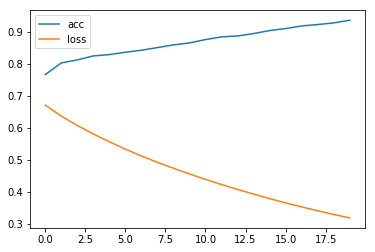

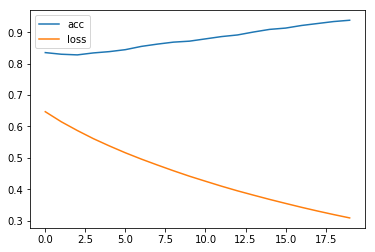

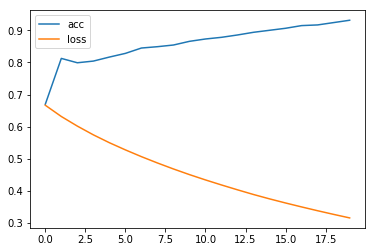

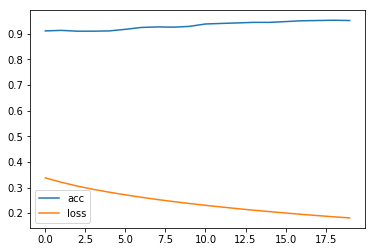

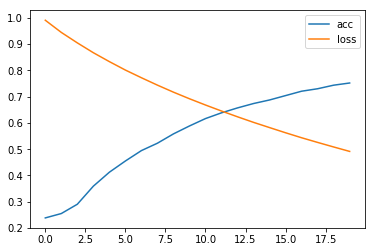

In [250]:
dflist=[]

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']
for init in initializers:
    a=pd.DataFrame(columns=('acc','loss'))
    K.clear_session()
    K.clear_session()
    model=Sequential()
    model.add(Dense(1,input_shape=(4,),kernel_initializer=init,activation='sigmoid'))
    model.compile(optimizer='rmsprop',metrics=['accuracy'],loss='binary_crossentropy')
    h=model.fit(X_train,y_train,batch_size=16,verbose=0,epochs=20)
    b=pd.DataFrame(h.history, index=h.epoch)
    a=a.append(b,ignore_index=True)
    print(opt_name)
    print(a.plot())

In [251]:
### Inner Layer Representation

In [252]:
K.clear_session()
model=Sequential()
model.add(Dense(2,input_shape=(4,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.01),metrics=['accuracy'])
h=model.fit(X_train,y_train,batch_size=16, epochs=20,verbose=1,validation_split=0.3)
result=model.evaluate(X_test,y_test)
print(result)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s 360us/step - loss: 0.6137 - acc: 0.6979 - val_loss: 0.5253 - val_acc: 0.8125
Epoch 2/20
672/672 [==============================] - 0s 56us/step - loss: 0.4437 - acc: 0.8899 - val_loss: 0.3535 - val_acc: 0.9444
Epoch 3/20
672/672 [==============================] - 0s 70us/step - loss: 0.3087 - acc: 0.9598 - val_loss: 0.2435 - val_acc: 0.9722
Epoch 4/20
672/672 [==============================] - 0s 71us/step - loss: 0.2247 - acc: 0.9688 - val_loss: 0.1744 - val_acc: 0.9826
Epoch 5/20
672/672 [==============================] - 0s 69us/step - loss: 0.1679 - acc: 0.9688 - val_loss: 0.1276 - val_acc: 0.9861
Epoch 6/20
672/672 [==============================] - 0s 70us/step - loss: 0.1283 - acc: 0.9747 - val_loss: 0.0993 - val_acc: 0.9861
Epoch 7/20
672/672 [==============================] - 0s 70us/step - loss: 0.1020 - acc: 0.9792 - val_loss: 0.0781 - val_acc: 0.9861
Epoch 8/20
672/672 [==

In [253]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [254]:
model.layers

In [255]:
inp=model.layers[0].input
out=model.layers[0].output

In [256]:
features_function=K.function([inp],[out])

In [257]:
features_function

In [258]:
features=features_function([X_test])[0]

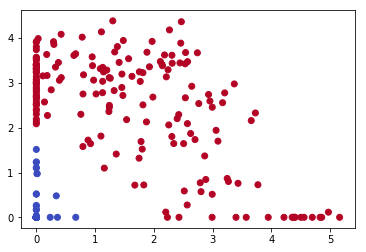

In [259]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [260]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 66us/step


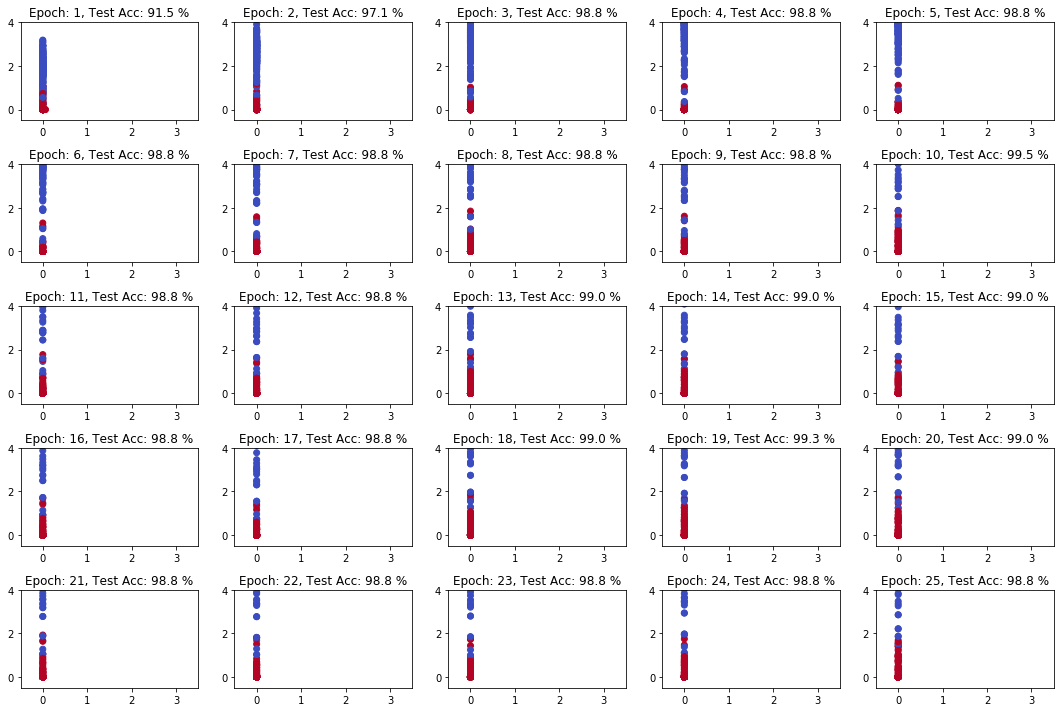

In [261]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

In [262]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [263]:
## MNIST DATA

In [264]:
from keras.datasets import mnist

In [265]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('mnist.npz')

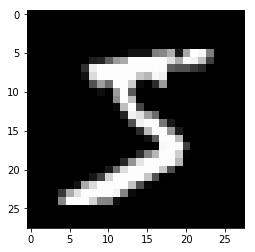

In [268]:
plt.imshow(X_train[0], cmap='gray')

In [269]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [271]:
X_train.shape

(60000, 784)

In [272]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [277]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [274]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [278]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 210us/step - loss: 0.3321 - acc: 0.8975 - val_loss: 0.3065 - val_acc: 0.9120
Epoch 2/10
42000/42000 [==============================] - 9s 206us/step - loss: 0.1108 - acc: 0.9665 - val_loss: 0.1740 - val_acc: 0.9498
Epoch 3/10
42000/42000 [==============================] - 9s 205us/step - loss: 0.0723 - acc: 0.9775 - val_loss: 0.1126 - val_acc: 0.9676
Epoch 4/10
42000/42000 [==============================] - 8s 198us/step - loss: 0.0529 - acc: 0.9839 - val_loss: 0.1231 - val_acc: 0.9688
Epoch 5/10
42000/42000 [==============================] - 9s 207us/step - loss: 0.0391 - acc: 0.9873 - val_loss: 0.1063 - val_acc: 0.9722
Epoch 6/10
42000/42000 [==============================] - 9s 214us/step - loss: 0.0330 - acc: 0.9901 - val_loss: 0.1273 - val_acc: 0.9711
Epoch 7/10
42000/42000 [==============================] - 11s 267us/step - loss: 0.0267 - acc: 0.9920 - val_loss: 0.1433 -

Text(0.5,0,'Epochs')

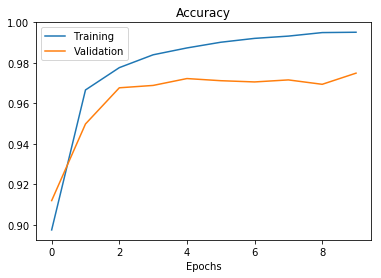

In [289]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [290]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 72us/step


0.9773

In [280]:
q=model.predict_classes(X_test)

In [283]:
len(X_test)

10000

In [286]:
q=model.predict_proba(X_test)
q[0]

array([1.2108558e-20, 1.7344136e-10, 1.8057179e-10, 2.4202407e-08,
       1.5852840e-12, 1.2155047e-16, 1.3537032e-17, 1.0000000e+00,
       3.5866318e-16, 1.5994213e-09], dtype=float32)

In [291]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [292]:
A

array([[[[2, 6, 8, 6, 6],
         [3, 2, 7, 7, 6],
         [8, 2, 5, 8, 8],
         [3, 8, 0, 1, 4]],

        [[1, 3, 9, 8, 9],
         [8, 5, 2, 8, 8],
         [7, 3, 3, 6, 6],
         [6, 9, 9, 6, 1]],

        [[0, 6, 7, 0, 0],
         [8, 4, 5, 5, 8],
         [1, 5, 5, 1, 6],
         [6, 5, 3, 7, 1]]],


       [[[3, 8, 6, 1, 3],
         [4, 5, 5, 6, 3],
         [7, 0, 6, 5, 7],
         [5, 8, 9, 4, 9]],

        [[6, 7, 4, 4, 0],
         [2, 6, 7, 4, 6],
         [3, 7, 2, 5, 4],
         [1, 3, 9, 2, 7]],

        [[4, 5, 0, 5, 0],
         [2, 0, 3, 3, 0],
         [5, 6, 8, 9, 3],
         [2, 5, 3, 8, 7]]]])

In [296]:
A[0, 1, 0, 2]

9

In [293]:
B

array([[5, 6, 3],
       [0, 5, 8]])

In [299]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[219,  58,  44],
        [246, 160,   5],
        [  9, 179, 130],
        [ 64, 200, 231]],

       [[ 83, 102,  29],
        [172, 114, 223],
        [118,   4,  85],
        [117, 215,  24]],

       [[107, 157,  95],
        [  9, 124,  54],
        [170, 149, 143],
        [ 55, 109,  16]],

       [[146,  78,  50],
        [ 97, 153,  34],
        [225,  17,  94],
        [175,  62, 167]]], dtype=uint8)

Text(0.5,1,'All Channels combined')

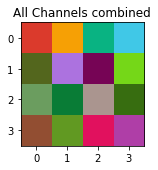

In [300]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

[[219 246   9  64]
 [ 83 172 118 117]
 [107   9 170  55]
 [146  97 225 175]]


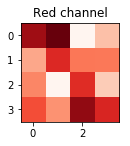

In [306]:
plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")
print(img[:, : , 0])

Text(0.5,1,'Green channel')

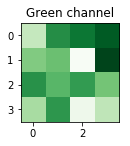

In [302]:
plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

Text(0.5,1,'Blue channel')

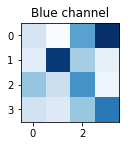

In [303]:
plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

In [305]:
img[:, : , 2]

array([[ 44,   5, 130, 231],
       [ 29, 223,  85,  24],
       [ 95,  54, 143,  16],
       [ 50,  34,  94, 167]], dtype=uint8)

In [307]:
A

array([[[[2, 6, 8, 6, 6],
         [3, 2, 7, 7, 6],
         [8, 2, 5, 8, 8],
         [3, 8, 0, 1, 4]],

        [[1, 3, 9, 8, 9],
         [8, 5, 2, 8, 8],
         [7, 3, 3, 6, 6],
         [6, 9, 9, 6, 1]],

        [[0, 6, 7, 0, 0],
         [8, 4, 5, 5, 8],
         [1, 5, 5, 1, 6],
         [6, 5, 3, 7, 1]]],


       [[[3, 8, 6, 1, 3],
         [4, 5, 5, 6, 3],
         [7, 0, 6, 5, 7],
         [5, 8, 9, 4, 9]],

        [[6, 7, 4, 4, 0],
         [2, 6, 7, 4, 6],
         [3, 7, 2, 5, 4],
         [1, 3, 9, 2, 7]],

        [[4, 5, 0, 5, 0],
         [2, 0, 3, 3, 0],
         [5, 6, 8, 9, 3],
         [2, 5, 3, 8, 7]]]])

In [308]:
2*A

array([[[[ 4, 12, 16, 12, 12],
         [ 6,  4, 14, 14, 12],
         [16,  4, 10, 16, 16],
         [ 6, 16,  0,  2,  8]],

        [[ 2,  6, 18, 16, 18],
         [16, 10,  4, 16, 16],
         [14,  6,  6, 12, 12],
         [12, 18, 18, 12,  2]],

        [[ 0, 12, 14,  0,  0],
         [16,  8, 10, 10, 16],
         [ 2, 10, 10,  2, 12],
         [12, 10,  6, 14,  2]]],


       [[[ 6, 16, 12,  2,  6],
         [ 8, 10, 10, 12,  6],
         [14,  0, 12, 10, 14],
         [10, 16, 18,  8, 18]],

        [[12, 14,  8,  8,  0],
         [ 4, 12, 14,  8, 12],
         [ 6, 14,  4, 10,  8],
         [ 2,  6, 18,  4, 14]],

        [[ 8, 10,  0, 10,  0],
         [ 4,  0,  6,  6,  0],
         [10, 12, 16, 18,  6],
         [ 4, 10,  6, 16, 14]]]])

In [309]:
A+A

array([[[[ 4, 12, 16, 12, 12],
         [ 6,  4, 14, 14, 12],
         [16,  4, 10, 16, 16],
         [ 6, 16,  0,  2,  8]],

        [[ 2,  6, 18, 16, 18],
         [16, 10,  4, 16, 16],
         [14,  6,  6, 12, 12],
         [12, 18, 18, 12,  2]],

        [[ 0, 12, 14,  0,  0],
         [16,  8, 10, 10, 16],
         [ 2, 10, 10,  2, 12],
         [12, 10,  6, 14,  2]]],


       [[[ 6, 16, 12,  2,  6],
         [ 8, 10, 10, 12,  6],
         [14,  0, 12, 10, 14],
         [10, 16, 18,  8, 18]],

        [[12, 14,  8,  8,  0],
         [ 4, 12, 14,  8, 12],
         [ 6, 14,  4, 10,  8],
         [ 2,  6, 18,  4, 14]],

        [[ 8, 10,  0, 10,  0],
         [ 4,  0,  6,  6,  0],
         [10, 12, 16, 18,  6],
         [ 4, 10,  6, 16, 14]]]])

In [310]:
A.shape

(2, 3, 4, 5)

In [311]:
B.shape

(2, 3)

In [313]:
A

array([[[[2, 6, 8, 6, 6],
         [3, 2, 7, 7, 6],
         [8, 2, 5, 8, 8],
         [3, 8, 0, 1, 4]],

        [[1, 3, 9, 8, 9],
         [8, 5, 2, 8, 8],
         [7, 3, 3, 6, 6],
         [6, 9, 9, 6, 1]],

        [[0, 6, 7, 0, 0],
         [8, 4, 5, 5, 8],
         [1, 5, 5, 1, 6],
         [6, 5, 3, 7, 1]]],


       [[[3, 8, 6, 1, 3],
         [4, 5, 5, 6, 3],
         [7, 0, 6, 5, 7],
         [5, 8, 9, 4, 9]],

        [[6, 7, 4, 4, 0],
         [2, 6, 7, 4, 6],
         [3, 7, 2, 5, 4],
         [1, 3, 9, 2, 7]],

        [[4, 5, 0, 5, 0],
         [2, 0, 3, 3, 0],
         [5, 6, 8, 9, 3],
         [2, 5, 3, 8, 7]]]])

In [321]:
B.shape

(2, 3)

In [312]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[ 78, 141, 135, 138,  84],
       [113,  82, 121, 142, 132],
       [140, 126, 132, 176, 138],
       [ 90, 164, 132, 136, 120]])

In [315]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [316]:
b = np.array([-1, 1], dtype='float32')

In [317]:
c = np.convolve(a, b)

In [318]:
a

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [319]:
b

array([-1.,  1.], dtype=float32)

In [320]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

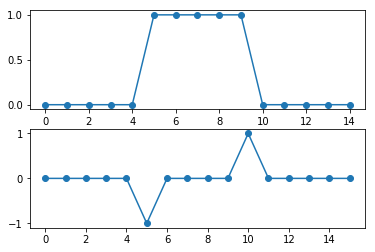

In [322]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-')